## AMAZON REVIEWS

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
# Grab and process the raw data.
reviews_raw = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/amazon_cells_labelled.txt", delimiter = '\t')
reviews_raw.columns = ['review', 'positive']
reviews_raw['positive'] = (reviews_raw['positive'] == 1)

In [13]:
reviews_raw.head()

,review,positive,good,like,best,easy,nice,great,perfect,recommend,...,must have,pleased,happy,brilliant,well made,adorable,excellent,priced right,quickly,comfort
0,"Good case, Excellent value.",True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,Great for the jawbone.,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,The mic is great.,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,I have to jiggle the plug to get it to line up...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
keywords = ['good','like','best','easy','nice','great','perfect','recommend','impressed', 'easier','love'
            ,'Beautiful','satisfied','must have','pleased','happy','brilliant','well made','adorable','excellent'
           ,'priced right','quickly','comfort']

for key in keywords:
    reviews_raw[str(key)] = reviews_raw.review.str.contains(
        str(key),
        case=False
    )


target = reviews_raw['positive']

In [15]:
reviews_pos = reviews_raw.query('positive == True ')
reviews_pos.head()  # Just look at positive reviews for some ideas for my keywords

,review,positive,good,like,best,easy,nice,great,perfect,recommend,...,must have,pleased,happy,brilliant,well made,adorable,excellent,priced right,quickly,comfort
0,"Good case, Excellent value.",True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,Great for the jawbone.,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,The mic is great.,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,If you are Razr owner...you must have this!,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
9,And the sound quality is great.,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


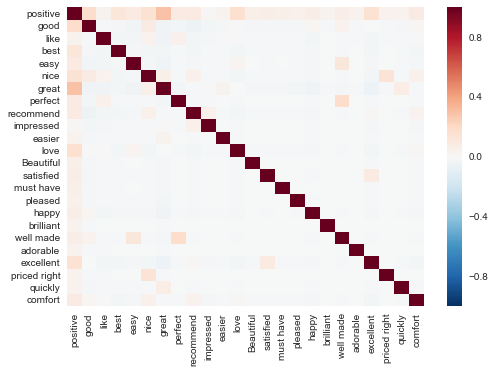

In [16]:
sns.heatmap(reviews_raw.corr())
plt.show()

Looks like none of my words are strongly correlated with another. With independent variables, I know the Bernoulli classifier should work well.

In [17]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
# Fit our model to the data.
data = reviews_raw[keywords]
bnb.fit(data, target)
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 999 points : 232


In [18]:
# Try another distribution _ Gaussian
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


In [19]:
# Fit our model to the data.
data = reviews_raw[keywords]
gnb.fit(data, target)
# Classify, storing the result in a new variable.
y_pred = gnb.predict(data)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 999 points : 379


In [20]:
# Bernoulli was better

In [21]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [22]:
# Fit our model to the data.
data = reviews_raw[keywords]
mnb.fit(data, target)
# Classify, storing the result in a new variable.
y_pred = mnb.predict(data)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 999 points : 596


In [191]:
# Bernoulli and Gaussian are better than Multinomial

In [192]:
# Try this model on another dataset: yelp

## Yelp dataset

In [23]:
# Grab and process the raw data.
yelp_reviews_raw = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/yelp_labelled.txt", delimiter = '\t')
yelp_reviews_raw.columns = ['review', 'positive']
yelp_reviews_raw['positive'] = (yelp_reviews_raw['positive'] == 1)

In [24]:
for key in keywords:#Using keywords from above
    yelp_reviews_raw[str(key)] = yelp_reviews_raw.review.str.contains(
        str(key),
        case=False
    )

target = yelp_reviews_raw['positive']

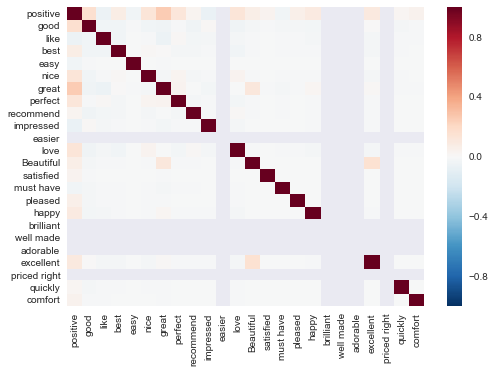

In [25]:
sns.heatmap(yelp_reviews_raw.corr())
plt.show()

You can see that some of my words aren't in the dataset. A few more of these are correlated, such as "beautiful" & "excellent". This may impact the model but will leave for now.

In [28]:
# Fit our model to the data.
data_yelp = yelp_reviews_raw[keywords]
bnb.fit(data_yelp, target)
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_yelp)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_yelp.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 999 points : 306


This is close to what we had before, but not as good since some of the words are not relevant

## IMBD database

In [30]:
# try on the IMBD database
# Grab and process the raw data.
i_reviews_raw = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/imdb_labelled.txt", delimiter = '\t')
i_reviews_raw.columns = ['review', 'positive']
i_reviews_raw['positive'] = (i_reviews_raw['positive'] == 1)

In [31]:
for key in keywords:#Using keywords from above
    i_reviews_raw[str(key)] = i_reviews_raw.review.str.contains(
        str(key),
        case=False
    )

target = i_reviews_raw['positive']

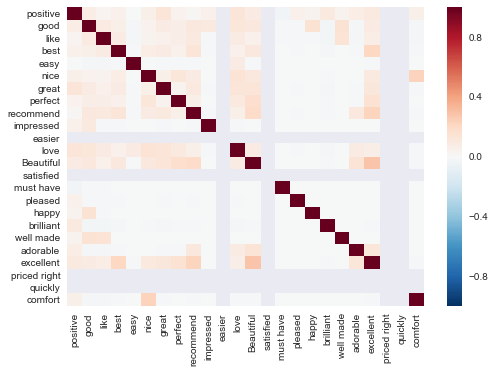

In [32]:
sns.heatmap(i_reviews_raw.corr())
plt.show()

In [33]:
# Fit our model to the data.
data_i = i_reviews_raw[keywords]
bnb.fit(data_i, target)
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_i)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_i.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 747 points : 286


This model didn't work that well - more errors with fewer data points

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.